## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 52.2ms	remaining: 52.2s
1:	learn: 0.9301086	total: 55.9ms	remaining: 27.9s
2:	learn: 0.9005637	total: 59.4ms	remaining: 19.7s
3:	learn: 0.8720983	total: 62.9ms	remaining: 15.7s
4:	learn: 0.8467410	total: 66.1ms	remaining: 13.2s
5:	learn: 0.8226672	total: 69.2ms	remaining: 11.5s
6:	learn: 0.7994702	total: 72.5ms	remaining: 10.3s
7:	learn: 0.7784272	total: 75.6ms	remaining: 9.37s
8:	learn: 0.7602192	total: 78.9ms	remaining: 8.69s
9:	learn: 0.7412421	total: 82.3ms	remaining: 8.14s
10:	learn: 0.7247930	total: 85.4ms	remaining: 7.68s
11:	learn: 0.7089951	total: 88.6ms	remaining: 7.3s
12:	learn: 0.6951345	total: 91.6ms	remaining: 6.96s
13:	learn: 0.6809276	total: 94.5ms	remaining: 6.66s
14:	learn: 0.6692630	total: 97.6ms	remaining: 6.41s
15:	learn: 0.6588323	total: 101ms	remaining: 6.19s
16:	learn: 0.6472700	total: 104ms	remaining: 6s
17:	learn: 0.6379982	total: 107ms	remaining: 5.82s
18:	learn: 0.6294674	total: 110ms	remaining: 5.67s


42:	learn: 0.5141148	total: 186ms	remaining: 4.13s
43:	learn: 0.5116444	total: 189ms	remaining: 4.11s
44:	learn: 0.5100547	total: 192ms	remaining: 4.07s
45:	learn: 0.5069096	total: 195ms	remaining: 4.04s
46:	learn: 0.5051685	total: 198ms	remaining: 4.01s
47:	learn: 0.5033968	total: 201ms	remaining: 3.98s
48:	learn: 0.5012433	total: 204ms	remaining: 3.96s
49:	learn: 0.4986132	total: 207ms	remaining: 3.93s
50:	learn: 0.4968022	total: 210ms	remaining: 3.91s
51:	learn: 0.4951632	total: 213ms	remaining: 3.88s
52:	learn: 0.4928924	total: 216ms	remaining: 3.85s
53:	learn: 0.4917272	total: 219ms	remaining: 3.83s
54:	learn: 0.4895079	total: 222ms	remaining: 3.82s
55:	learn: 0.4881884	total: 225ms	remaining: 3.79s
56:	learn: 0.4861566	total: 229ms	remaining: 3.78s
57:	learn: 0.4850201	total: 232ms	remaining: 3.76s
58:	learn: 0.4840055	total: 235ms	remaining: 3.74s
59:	learn: 0.4824455	total: 238ms	remaining: 3.72s
60:	learn: 0.4809744	total: 241ms	remaining: 3.71s
61:	learn: 0.4801376	total: 244

104:	learn: 0.4461730	total: 377ms	remaining: 3.21s
105:	learn: 0.4457259	total: 380ms	remaining: 3.2s
106:	learn: 0.4451085	total: 383ms	remaining: 3.19s
107:	learn: 0.4447909	total: 386ms	remaining: 3.19s
108:	learn: 0.4440936	total: 389ms	remaining: 3.18s
109:	learn: 0.4435519	total: 392ms	remaining: 3.17s
110:	learn: 0.4431075	total: 395ms	remaining: 3.16s
111:	learn: 0.4425498	total: 398ms	remaining: 3.16s
112:	learn: 0.4419106	total: 401ms	remaining: 3.15s
113:	learn: 0.4414425	total: 404ms	remaining: 3.14s
114:	learn: 0.4407446	total: 407ms	remaining: 3.13s
115:	learn: 0.4402011	total: 410ms	remaining: 3.13s
116:	learn: 0.4398559	total: 413ms	remaining: 3.12s
117:	learn: 0.4392990	total: 416ms	remaining: 3.11s
118:	learn: 0.4389153	total: 419ms	remaining: 3.1s
119:	learn: 0.4383331	total: 422ms	remaining: 3.1s
120:	learn: 0.4378136	total: 425ms	remaining: 3.09s
121:	learn: 0.4375553	total: 428ms	remaining: 3.08s
122:	learn: 0.4369995	total: 431ms	remaining: 3.07s
123:	learn: 0.4

167:	learn: 0.4173026	total: 570ms	remaining: 2.82s
168:	learn: 0.4170486	total: 574ms	remaining: 2.82s
169:	learn: 0.4165960	total: 577ms	remaining: 2.81s
170:	learn: 0.4161870	total: 579ms	remaining: 2.81s
171:	learn: 0.4156228	total: 583ms	remaining: 2.81s
172:	learn: 0.4153041	total: 586ms	remaining: 2.8s
173:	learn: 0.4148857	total: 589ms	remaining: 2.79s
174:	learn: 0.4144190	total: 592ms	remaining: 2.79s
175:	learn: 0.4140875	total: 595ms	remaining: 2.79s
176:	learn: 0.4136755	total: 598ms	remaining: 2.78s
177:	learn: 0.4133860	total: 601ms	remaining: 2.77s
178:	learn: 0.4129780	total: 604ms	remaining: 2.77s
179:	learn: 0.4122907	total: 607ms	remaining: 2.76s
180:	learn: 0.4119188	total: 610ms	remaining: 2.76s
181:	learn: 0.4115412	total: 613ms	remaining: 2.75s
182:	learn: 0.4112620	total: 616ms	remaining: 2.75s
183:	learn: 0.4107734	total: 619ms	remaining: 2.75s
184:	learn: 0.4104881	total: 622ms	remaining: 2.74s
185:	learn: 0.4100009	total: 625ms	remaining: 2.73s
186:	learn: 0

230:	learn: 0.3957018	total: 762ms	remaining: 2.54s
231:	learn: 0.3954162	total: 765ms	remaining: 2.53s
232:	learn: 0.3951665	total: 768ms	remaining: 2.53s
233:	learn: 0.3949269	total: 771ms	remaining: 2.52s
234:	learn: 0.3945894	total: 774ms	remaining: 2.52s
235:	learn: 0.3944181	total: 777ms	remaining: 2.52s
236:	learn: 0.3941497	total: 781ms	remaining: 2.51s
237:	learn: 0.3939819	total: 784ms	remaining: 2.51s
238:	learn: 0.3938322	total: 786ms	remaining: 2.5s
239:	learn: 0.3935463	total: 789ms	remaining: 2.5s
240:	learn: 0.3933166	total: 792ms	remaining: 2.5s
241:	learn: 0.3930992	total: 796ms	remaining: 2.49s
242:	learn: 0.3928898	total: 799ms	remaining: 2.49s
243:	learn: 0.3926199	total: 802ms	remaining: 2.48s
244:	learn: 0.3923955	total: 805ms	remaining: 2.48s
245:	learn: 0.3922312	total: 807ms	remaining: 2.47s
246:	learn: 0.3919499	total: 811ms	remaining: 2.47s
247:	learn: 0.3917420	total: 813ms	remaining: 2.47s
248:	learn: 0.3915186	total: 816ms	remaining: 2.46s
249:	learn: 0.3

292:	learn: 0.3812172	total: 949ms	remaining: 2.29s
293:	learn: 0.3809978	total: 952ms	remaining: 2.29s
294:	learn: 0.3807825	total: 955ms	remaining: 2.28s
295:	learn: 0.3805940	total: 959ms	remaining: 2.28s
296:	learn: 0.3801959	total: 962ms	remaining: 2.28s
297:	learn: 0.3799439	total: 965ms	remaining: 2.27s
298:	learn: 0.3797228	total: 968ms	remaining: 2.27s
299:	learn: 0.3795554	total: 971ms	remaining: 2.26s
300:	learn: 0.3793733	total: 974ms	remaining: 2.26s
301:	learn: 0.3791607	total: 977ms	remaining: 2.26s
302:	learn: 0.3789297	total: 980ms	remaining: 2.25s
303:	learn: 0.3787482	total: 983ms	remaining: 2.25s
304:	learn: 0.3786528	total: 986ms	remaining: 2.25s
305:	learn: 0.3784406	total: 989ms	remaining: 2.24s
306:	learn: 0.3782934	total: 992ms	remaining: 2.24s
307:	learn: 0.3781631	total: 995ms	remaining: 2.23s
308:	learn: 0.3779278	total: 998ms	remaining: 2.23s
309:	learn: 0.3777358	total: 1s	remaining: 2.23s
310:	learn: 0.3775809	total: 1s	remaining: 2.22s
311:	learn: 0.3774

353:	learn: 0.3695617	total: 1.14s	remaining: 2.07s
354:	learn: 0.3694397	total: 1.14s	remaining: 2.07s
355:	learn: 0.3692589	total: 1.14s	remaining: 2.07s
356:	learn: 0.3691107	total: 1.15s	remaining: 2.06s
357:	learn: 0.3689645	total: 1.15s	remaining: 2.06s
358:	learn: 0.3687886	total: 1.15s	remaining: 2.06s
359:	learn: 0.3686485	total: 1.16s	remaining: 2.05s
360:	learn: 0.3685749	total: 1.16s	remaining: 2.05s
361:	learn: 0.3683909	total: 1.16s	remaining: 2.05s
362:	learn: 0.3682710	total: 1.16s	remaining: 2.04s
363:	learn: 0.3681254	total: 1.17s	remaining: 2.04s
364:	learn: 0.3679761	total: 1.17s	remaining: 2.04s
365:	learn: 0.3677932	total: 1.17s	remaining: 2.03s
366:	learn: 0.3676022	total: 1.18s	remaining: 2.03s
367:	learn: 0.3674148	total: 1.18s	remaining: 2.02s
368:	learn: 0.3673439	total: 1.18s	remaining: 2.02s
369:	learn: 0.3671985	total: 1.18s	remaining: 2.02s
370:	learn: 0.3670563	total: 1.19s	remaining: 2.01s
371:	learn: 0.3669128	total: 1.19s	remaining: 2.01s
372:	learn: 

416:	learn: 0.3594487	total: 1.33s	remaining: 1.86s
417:	learn: 0.3592759	total: 1.33s	remaining: 1.85s
418:	learn: 0.3591088	total: 1.33s	remaining: 1.85s
419:	learn: 0.3589470	total: 1.34s	remaining: 1.85s
420:	learn: 0.3587972	total: 1.34s	remaining: 1.84s
421:	learn: 0.3586831	total: 1.34s	remaining: 1.84s
422:	learn: 0.3585620	total: 1.35s	remaining: 1.84s
423:	learn: 0.3584427	total: 1.35s	remaining: 1.83s
424:	learn: 0.3583044	total: 1.35s	remaining: 1.83s
425:	learn: 0.3581698	total: 1.36s	remaining: 1.83s
426:	learn: 0.3580461	total: 1.36s	remaining: 1.82s
427:	learn: 0.3579182	total: 1.36s	remaining: 1.82s
428:	learn: 0.3577521	total: 1.37s	remaining: 1.82s
429:	learn: 0.3576138	total: 1.37s	remaining: 1.81s
430:	learn: 0.3575528	total: 1.37s	remaining: 1.81s
431:	learn: 0.3574686	total: 1.38s	remaining: 1.81s
432:	learn: 0.3572923	total: 1.38s	remaining: 1.8s
433:	learn: 0.3571859	total: 1.38s	remaining: 1.8s
434:	learn: 0.3570185	total: 1.38s	remaining: 1.8s
435:	learn: 0.3

473:	learn: 0.3514906	total: 1.53s	remaining: 1.69s
474:	learn: 0.3513843	total: 1.53s	remaining: 1.69s
475:	learn: 0.3512406	total: 1.53s	remaining: 1.69s
476:	learn: 0.3510044	total: 1.53s	remaining: 1.68s
477:	learn: 0.3509121	total: 1.54s	remaining: 1.68s
478:	learn: 0.3507270	total: 1.54s	remaining: 1.68s
479:	learn: 0.3506003	total: 1.54s	remaining: 1.67s
480:	learn: 0.3505111	total: 1.55s	remaining: 1.67s
481:	learn: 0.3503906	total: 1.55s	remaining: 1.67s
482:	learn: 0.3501522	total: 1.55s	remaining: 1.66s
483:	learn: 0.3500494	total: 1.56s	remaining: 1.66s
484:	learn: 0.3498921	total: 1.56s	remaining: 1.66s
485:	learn: 0.3497143	total: 1.56s	remaining: 1.66s
486:	learn: 0.3496172	total: 1.57s	remaining: 1.65s
487:	learn: 0.3494609	total: 1.57s	remaining: 1.65s
488:	learn: 0.3493200	total: 1.57s	remaining: 1.65s
489:	learn: 0.3491550	total: 1.58s	remaining: 1.64s
490:	learn: 0.3490323	total: 1.58s	remaining: 1.64s
491:	learn: 0.3488767	total: 1.58s	remaining: 1.64s
492:	learn: 

534:	learn: 0.3433236	total: 1.72s	remaining: 1.5s
535:	learn: 0.3432219	total: 1.72s	remaining: 1.49s
536:	learn: 0.3431615	total: 1.73s	remaining: 1.49s
537:	learn: 0.3430198	total: 1.73s	remaining: 1.49s
538:	learn: 0.3429422	total: 1.73s	remaining: 1.48s
539:	learn: 0.3428024	total: 1.74s	remaining: 1.48s
540:	learn: 0.3426641	total: 1.74s	remaining: 1.48s
541:	learn: 0.3425885	total: 1.74s	remaining: 1.47s
542:	learn: 0.3424695	total: 1.75s	remaining: 1.47s
543:	learn: 0.3423997	total: 1.75s	remaining: 1.47s
544:	learn: 0.3422315	total: 1.75s	remaining: 1.46s
545:	learn: 0.3421242	total: 1.75s	remaining: 1.46s
546:	learn: 0.3419673	total: 1.76s	remaining: 1.46s
547:	learn: 0.3418121	total: 1.76s	remaining: 1.45s
548:	learn: 0.3416228	total: 1.76s	remaining: 1.45s
549:	learn: 0.3414331	total: 1.77s	remaining: 1.45s
550:	learn: 0.3413090	total: 1.77s	remaining: 1.44s
551:	learn: 0.3411591	total: 1.77s	remaining: 1.44s
552:	learn: 0.3410901	total: 1.78s	remaining: 1.44s
553:	learn: 0

596:	learn: 0.3366496	total: 1.91s	remaining: 1.29s
597:	learn: 0.3365561	total: 1.92s	remaining: 1.29s
598:	learn: 0.3364801	total: 1.92s	remaining: 1.28s
599:	learn: 0.3363937	total: 1.92s	remaining: 1.28s
600:	learn: 0.3363054	total: 1.92s	remaining: 1.28s
601:	learn: 0.3361892	total: 1.93s	remaining: 1.27s
602:	learn: 0.3360683	total: 1.93s	remaining: 1.27s
603:	learn: 0.3359807	total: 1.93s	remaining: 1.27s
604:	learn: 0.3359096	total: 1.94s	remaining: 1.26s
605:	learn: 0.3358268	total: 1.94s	remaining: 1.26s
606:	learn: 0.3356597	total: 1.94s	remaining: 1.26s
607:	learn: 0.3355448	total: 1.95s	remaining: 1.25s
608:	learn: 0.3354512	total: 1.95s	remaining: 1.25s
609:	learn: 0.3353398	total: 1.95s	remaining: 1.25s
610:	learn: 0.3352669	total: 1.96s	remaining: 1.25s
611:	learn: 0.3351716	total: 1.96s	remaining: 1.24s
612:	learn: 0.3351155	total: 1.97s	remaining: 1.24s
613:	learn: 0.3350041	total: 1.97s	remaining: 1.24s
614:	learn: 0.3349098	total: 1.97s	remaining: 1.23s
615:	learn: 

655:	learn: 0.3306809	total: 2.1s	remaining: 1.1s
656:	learn: 0.3305729	total: 2.11s	remaining: 1.1s
657:	learn: 0.3304900	total: 2.11s	remaining: 1.1s
658:	learn: 0.3303842	total: 2.11s	remaining: 1.09s
659:	learn: 0.3302235	total: 2.12s	remaining: 1.09s
660:	learn: 0.3300983	total: 2.12s	remaining: 1.09s
661:	learn: 0.3299994	total: 2.12s	remaining: 1.08s
662:	learn: 0.3299184	total: 2.13s	remaining: 1.08s
663:	learn: 0.3298189	total: 2.13s	remaining: 1.08s
664:	learn: 0.3296970	total: 2.13s	remaining: 1.07s
665:	learn: 0.3296671	total: 2.13s	remaining: 1.07s
666:	learn: 0.3295999	total: 2.14s	remaining: 1.07s
667:	learn: 0.3295390	total: 2.14s	remaining: 1.06s
668:	learn: 0.3294195	total: 2.14s	remaining: 1.06s
669:	learn: 0.3293185	total: 2.15s	remaining: 1.06s
670:	learn: 0.3292086	total: 2.15s	remaining: 1.05s
671:	learn: 0.3289913	total: 2.15s	remaining: 1.05s
672:	learn: 0.3288859	total: 2.16s	remaining: 1.05s
673:	learn: 0.3288145	total: 2.16s	remaining: 1.04s
674:	learn: 0.32

716:	learn: 0.3249511	total: 2.29s	remaining: 906ms
717:	learn: 0.3248372	total: 2.3s	remaining: 903ms
718:	learn: 0.3247371	total: 2.3s	remaining: 900ms
719:	learn: 0.3246676	total: 2.31s	remaining: 897ms
720:	learn: 0.3245862	total: 2.31s	remaining: 894ms
721:	learn: 0.3245270	total: 2.31s	remaining: 890ms
722:	learn: 0.3244558	total: 2.31s	remaining: 887ms
723:	learn: 0.3243835	total: 2.32s	remaining: 884ms
724:	learn: 0.3242957	total: 2.32s	remaining: 880ms
725:	learn: 0.3242628	total: 2.32s	remaining: 877ms
726:	learn: 0.3242076	total: 2.33s	remaining: 874ms
727:	learn: 0.3240923	total: 2.33s	remaining: 871ms
728:	learn: 0.3240148	total: 2.33s	remaining: 868ms
729:	learn: 0.3239014	total: 2.34s	remaining: 865ms
730:	learn: 0.3237918	total: 2.34s	remaining: 861ms
731:	learn: 0.3236654	total: 2.34s	remaining: 858ms
732:	learn: 0.3235938	total: 2.35s	remaining: 855ms
733:	learn: 0.3235120	total: 2.35s	remaining: 852ms
734:	learn: 0.3234421	total: 2.35s	remaining: 849ms
735:	learn: 0.

777:	learn: 0.3196478	total: 2.49s	remaining: 710ms
778:	learn: 0.3194714	total: 2.49s	remaining: 706ms
779:	learn: 0.3194042	total: 2.49s	remaining: 703ms
780:	learn: 0.3193209	total: 2.5s	remaining: 700ms
781:	learn: 0.3192009	total: 2.5s	remaining: 697ms
782:	learn: 0.3191109	total: 2.5s	remaining: 694ms
783:	learn: 0.3190255	total: 2.51s	remaining: 690ms
784:	learn: 0.3189403	total: 2.51s	remaining: 687ms
785:	learn: 0.3188715	total: 2.51s	remaining: 684ms
786:	learn: 0.3188016	total: 2.52s	remaining: 681ms
787:	learn: 0.3187670	total: 2.52s	remaining: 678ms
788:	learn: 0.3186601	total: 2.52s	remaining: 674ms
789:	learn: 0.3185886	total: 2.52s	remaining: 671ms
790:	learn: 0.3185418	total: 2.53s	remaining: 668ms
791:	learn: 0.3184514	total: 2.53s	remaining: 665ms
792:	learn: 0.3183529	total: 2.53s	remaining: 662ms
793:	learn: 0.3182569	total: 2.54s	remaining: 658ms
794:	learn: 0.3181932	total: 2.54s	remaining: 655ms
795:	learn: 0.3180848	total: 2.54s	remaining: 652ms
796:	learn: 0.3

839:	learn: 0.3144908	total: 2.68s	remaining: 510ms
840:	learn: 0.3144038	total: 2.68s	remaining: 507ms
841:	learn: 0.3143434	total: 2.68s	remaining: 504ms
842:	learn: 0.3142662	total: 2.69s	remaining: 500ms
843:	learn: 0.3141532	total: 2.69s	remaining: 497ms
844:	learn: 0.3140919	total: 2.69s	remaining: 494ms
845:	learn: 0.3140384	total: 2.69s	remaining: 491ms
846:	learn: 0.3139822	total: 2.7s	remaining: 488ms
847:	learn: 0.3138839	total: 2.7s	remaining: 484ms
848:	learn: 0.3138291	total: 2.7s	remaining: 481ms
849:	learn: 0.3137772	total: 2.71s	remaining: 478ms
850:	learn: 0.3137138	total: 2.71s	remaining: 475ms
851:	learn: 0.3136859	total: 2.71s	remaining: 471ms
852:	learn: 0.3136054	total: 2.72s	remaining: 468ms
853:	learn: 0.3135239	total: 2.72s	remaining: 465ms
854:	learn: 0.3134711	total: 2.72s	remaining: 462ms
855:	learn: 0.3134242	total: 2.73s	remaining: 459ms
856:	learn: 0.3133249	total: 2.73s	remaining: 455ms
857:	learn: 0.3132311	total: 2.73s	remaining: 452ms
858:	learn: 0.3

901:	learn: 0.3099635	total: 2.87s	remaining: 311ms
902:	learn: 0.3098989	total: 2.87s	remaining: 308ms
903:	learn: 0.3098084	total: 2.87s	remaining: 305ms
904:	learn: 0.3097402	total: 2.88s	remaining: 302ms
905:	learn: 0.3096378	total: 2.88s	remaining: 299ms
906:	learn: 0.3095878	total: 2.88s	remaining: 296ms
907:	learn: 0.3095154	total: 2.88s	remaining: 292ms
908:	learn: 0.3094688	total: 2.89s	remaining: 289ms
909:	learn: 0.3093784	total: 2.89s	remaining: 286ms
910:	learn: 0.3093058	total: 2.89s	remaining: 283ms
911:	learn: 0.3092574	total: 2.9s	remaining: 280ms
912:	learn: 0.3092023	total: 2.9s	remaining: 276ms
913:	learn: 0.3091306	total: 2.9s	remaining: 273ms
914:	learn: 0.3090719	total: 2.91s	remaining: 270ms
915:	learn: 0.3090199	total: 2.91s	remaining: 267ms
916:	learn: 0.3089417	total: 2.91s	remaining: 264ms
917:	learn: 0.3088562	total: 2.92s	remaining: 261ms
918:	learn: 0.3087578	total: 2.92s	remaining: 257ms
919:	learn: 0.3086793	total: 2.92s	remaining: 254ms
920:	learn: 0.3

961:	learn: 0.3054462	total: 3.06s	remaining: 121ms
962:	learn: 0.3053516	total: 3.06s	remaining: 118ms
963:	learn: 0.3052664	total: 3.06s	remaining: 114ms
964:	learn: 0.3052264	total: 3.07s	remaining: 111ms
965:	learn: 0.3051873	total: 3.07s	remaining: 108ms
966:	learn: 0.3051018	total: 3.07s	remaining: 105ms
967:	learn: 0.3050172	total: 3.08s	remaining: 102ms
968:	learn: 0.3049470	total: 3.08s	remaining: 98.6ms
969:	learn: 0.3049028	total: 3.08s	remaining: 95.4ms
970:	learn: 0.3048446	total: 3.09s	remaining: 92.2ms
971:	learn: 0.3047712	total: 3.09s	remaining: 89ms
972:	learn: 0.3047313	total: 3.09s	remaining: 85.8ms
973:	learn: 0.3046600	total: 3.1s	remaining: 82.6ms
974:	learn: 0.3045983	total: 3.1s	remaining: 79.5ms
975:	learn: 0.3044944	total: 3.1s	remaining: 76.3ms
976:	learn: 0.3044431	total: 3.1s	remaining: 73.1ms
977:	learn: 0.3043959	total: 3.11s	remaining: 69.9ms
978:	learn: 0.3043249	total: 3.11s	remaining: 66.7ms
979:	learn: 0.3042644	total: 3.11s	remaining: 63.6ms
980:	l

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
1.2733966675585027


#### Sanity Checks 

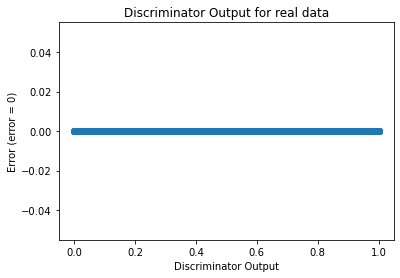

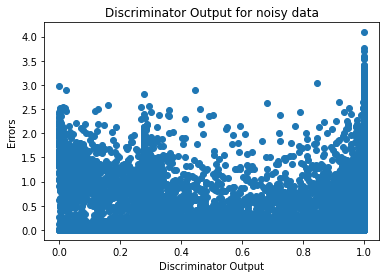

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)